

Goal of PCA 
- Reduce diemsions 
- Preverse as much information ( varience  ) as possible 
- Eliminate redundant features 


Resource : 
    - https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Create data set 

In [1]:
import numpy as np

# Feature data (3D)
X = np.array([
    [2.5, 2.4, 1.2],  # class 1
    [0.5, 0.7, 0.3],  # class 0
    [2.2, 2.9, 1.4],  # class 1
    [1.9, 2.2, 1.1],  # class 1
    [3.1, 3.0, 1.6],  # class 1
    [2.3, 2.7, 1.3],  # class 1
    [2.0, 1.6, 0.9],  # class 1
    [1.0, 1.1, 0.5],  # class 0
    [1.5, 1.6, 0.8],  # class 0
    [1.1, 0.9, 0.4]   # class 0
])

# Labels (class)
y = np.arange(1 , len(X) +1 , 1)

# test data set 
print(y)

[ 1  2  3  4  5  6  7  8  9 10]


Visualization data set before handle 

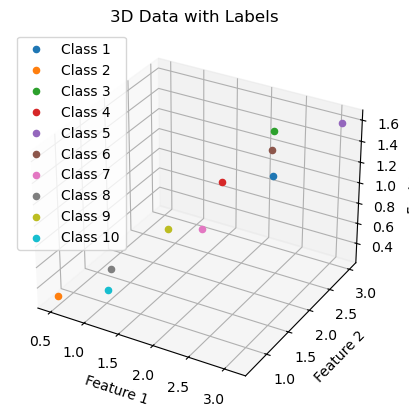

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    ax.scatter(
        X[y == label, 0],
        X[y == label, 1],
        X[y == label, 2],
        label=f'Class {label}'
    )

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Data with Labels")
ax.legend()
plt.show()


## Step 1 : Standardization 
- Calculate muy , varience .
- Z is matrix data standarded . 

In [3]:
print(X)

[[2.5 2.4 1.2]
 [0.5 0.7 0.3]
 [2.2 2.9 1.4]
 [1.9 2.2 1.1]
 [3.1 3.  1.6]
 [2.3 2.7 1.3]
 [2.  1.6 0.9]
 [1.  1.1 0.5]
 [1.5 1.6 0.8]
 [1.1 0.9 0.4]]


In [4]:
# calcualte mean 
muy = np.mean(X , axis= 0) 
print(f"Mean of X {muy}")

# calculate standard deviation 
variance = np.var(X , axis= 0)
standard_deviation = np.sqrt(variance)
print(f"Standard deviation of X {standard_deviation}")

# calculate Z 
Z = (X - muy) / standard_deviation
print(f"Z matrix follow formula Z = (X - mean )/ standard deviation :\n{Z}")

Mean of X [1.81 1.91 0.95]
Standard deviation of X [0.7449161  0.80305666 0.4224926 ]
Z matrix follow formula Z = (X - mean )/ standard deviation :
[[ 0.92627881  0.61016865  0.59172634]
 [-1.7585873  -1.506743   -1.53848847]
 [ 0.52354889  1.23278973  1.0651074 ]
 [ 0.12081898  0.36112022  0.3550358 ]
 [ 1.73173864  1.35731394  1.53848847]
 [ 0.6577922   0.9837413   0.82841687]
 [ 0.25506228 -0.38602507 -0.11834527]
 [-1.08737078 -1.00864614 -1.0651074 ]
 [-0.41615425 -0.38602507 -0.3550358 ]
 [-0.95312747 -1.25769457 -1.30179794]]


## Step 2 : Covariance Matrix Computation 
- Aim : understand how the variables of the input data set are varying from the mean with respect to each other , to see if there is any relationship between them . Because sometimes, variables are highly correlated in such a way that they contain redundant information .
- The covariance matrix is a p x p symmetric ( where p is the number of dimensions ) 
with 3 variables x , y and z .

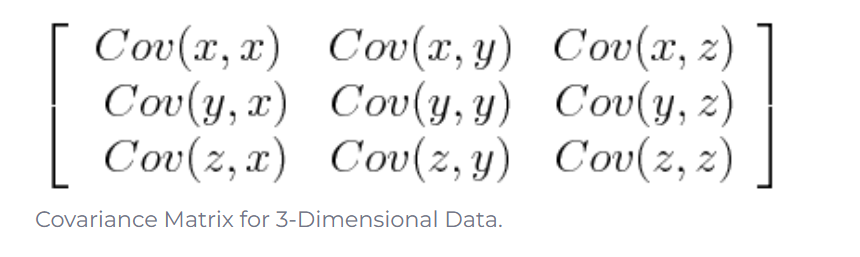

It’s actually the sign of the covariance that matters:

- If positive then: the two variables increase or decrease together (correlated)
- If negative then: one increases when the other decreases (Inversely correlated)

Use it or n - 1:

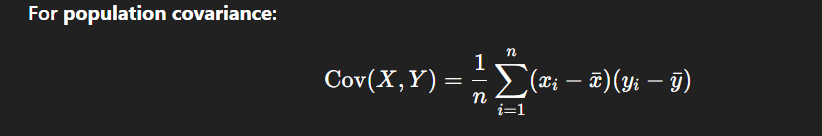

In [5]:
dimension = len(X[0])

def Cov( X , Y ) :
    sample = len(X) - 1
    return np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / sample 

corr_Z = []

for i in range(dimension ):
    new_vector = []
    for j in range(dimension ):
        new_vector.append(Cov(X[:,i] , X[:,j]))
    corr_Z.append(new_vector)


corr_Z = np.array(corr_Z)
print(corr_Z)

print("\nDouble check by function cov in numpy : ")
print(np.cov(X - np.mean(X), rowvar = False ))


[[0.61655556 0.61544444 0.335     ]
 [0.61544444 0.71655556 0.37388889]
 [0.335      0.37388889 0.19833333]]

Double check by function cov in numpy : 
[[0.61655556 0.61544444 0.335     ]
 [0.61544444 0.71655556 0.37388889]
 [0.335      0.37388889 0.19833333]]


## STEP 3 : Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
- Solve this equation to find lambda_1 and lambda_2  : 

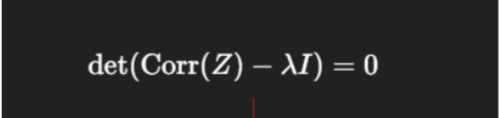

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


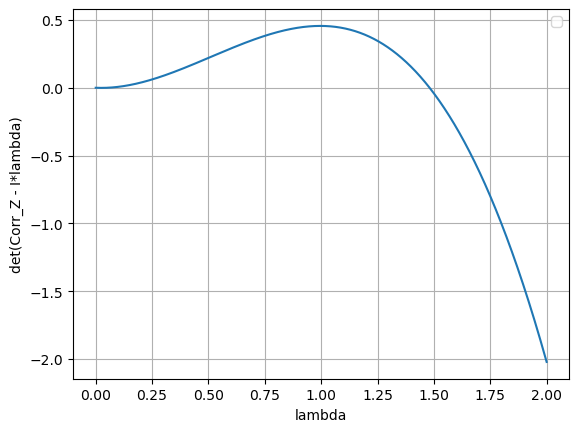

In [6]:
%matplotlib inline 
import matplotlib.pyplot 

I = np.eye(dimension)
a , b = 0, 2    # b =0.2 to zoom in 

lambda_1 , lambda_2 =  0  , 0 

range_lambda = np.arange(a, b, 0.0005)

range_corr_Z = []
for lamb in range_lambda :
    range_corr_Z.append(np.linalg.det(corr_Z - lamb * I))


plt.plot(range_lambda , range_corr_Z)

plt.xlabel("lambda")
plt.ylabel("det(Corr_Z - I*lambda)")
plt.grid(True)
plt.legend()


We get max{lambda_1 , lambda_2 } so we get a = 1.0 , b = 1.5

value of lambda : 1.4805450439453125


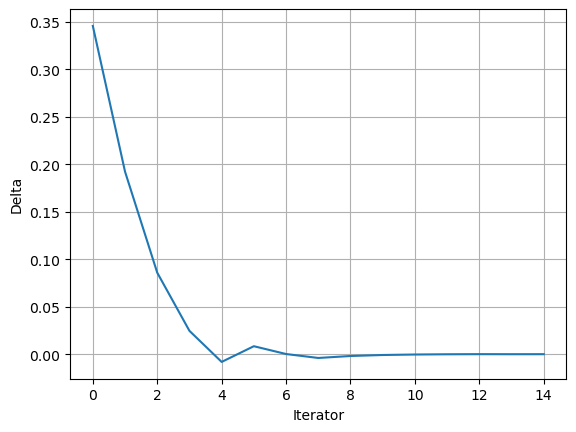

In [7]:
# declare
iterator_max  = 15

a , b = 1.0 , 1.5 
delta = []
epsilon = 1e-7

for i in range(iterator_max):
    c = (a + b ) / 2 
    new_value = np.linalg.det(corr_Z - c * I)
    delta.append(new_value)
    if new_value > 0 :
        a = c
    else :
        b =c 


print(f"value of lambda : {c}")

plt.plot(range(0 , iterator_max , 1) , delta )
plt.grid(True)
plt.xlabel("Iterator")
plt.ylabel("Delta")
plt.show()




Step 4: Create a Feature Vector

In [11]:
# moreover , we can double check and find eigenvectors by function in numpy library 
eigenvalues , eigenvectors = np.linalg.eig(corr_Z)
print(eigenvalues)

print(f"eigenvector \n {eigenvectors}")

PC2 = eigenvectors[: , 1 : 3]
print(f"vector PC 2 illustrate 2 dimension\n {PC2}")

PC1 = eigenvectors[: , 1 ]
print(f"vector PC 2 illustrate 2 dimension\n {PC1}")

[1.48054288e+00 5.00024353e-02 8.99133296e-04]
eigenvector 
 [[ 0.62988172  0.76326535 -0.14378812]
 [ 0.68582155 -0.63346722 -0.35828491]
 [ 0.36455152 -0.12706413  0.92247325]]
vector PC 2 illustrate 2 dimension
 [[ 0.76326535 -0.14378812]
 [-0.63346722 -0.35828491]
 [-0.12706413  0.92247325]]
vector PC 2 illustrate 2 dimension
 [ 0.76326535 -0.63346722 -0.12706413]


Step 5: Recast the Data Along the Principal Components Axes

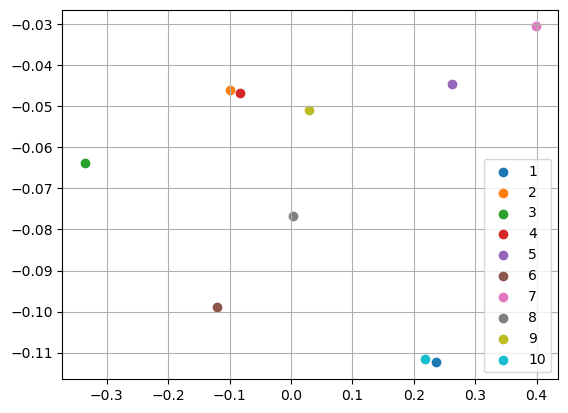

In [ ]:
# Visualization 2 dimension 

X_2 = np.dot(X , PC2 )

for i in range(len(X)):
    plt.scatter(X_2[i , 0] , X_2[i , 1] , label = y[i])
plt.legend()
plt.grid(True)
plt.show()

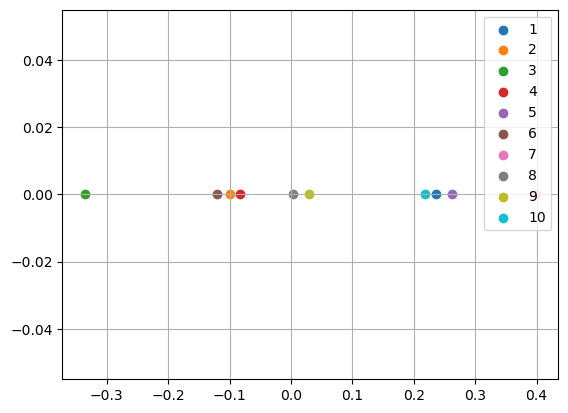

In [28]:
X_1 = np.dot(X , PC1)
zero = [0] * len(X_1)

for i in range(len(X)):
    plt.scatter(X_1[i], 0, label = y[i])
plt.legend()
plt.grid(True)
plt.show()